# Pre processing 

In [26]:
import pandas as pd
import numpy as np

In [27]:
df = pd.read_csv("train_v9rqX0R.csv")

In [28]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [29]:
df_copy=df

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [31]:
df2 = df[['Item_Identifier', 'Item_Weight']]

In [32]:
df2.duplicated().sum()

5826

In [33]:
#Dropping the duplicates in Item_Identifier', 'Item_Weight
df2 = df2.drop_duplicates()

In [34]:
df2

,Item_Identifier,Item_Weight
0,FDA15,9.30
1,DRC01,5.92
2,FDN15,17.50
3,FDX07,19.20
4,NCD19,8.93
...,...,...
8471,NCT53,5.40
8472,NCS41,NaN
8480,FDQ58,NaN
8487,DRG13,NaN


In [35]:
df2 = df2[df2['Item_Weight'].notna()]

In [36]:
df2.count()

Item_Identifier    1555
Item_Weight        1555
dtype: int64

In [37]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [38]:
df3 = df[['Outlet_Identifier', 'Outlet_Size']]

In [39]:
df3.duplicated().sum()

8513

In [40]:
df3=df3.drop_duplicates()

In [41]:
df3.duplicated().sum()

0

In [42]:
df3 = df3[df3['Outlet_Size'].notna()]

In [43]:
df3

,Outlet_Identifier,Outlet_Size
0,OUT049,Medium
1,OUT018,Medium
4,OUT013,High
7,OUT027,Medium
11,OUT046,Small
19,OUT035,Small
23,OUT019,Small


In [44]:
#Filling the null values in main data frame with small values

df['Outlet_Size']=df['Outlet_Size'].fillna('Small')

In [45]:
#removing the Item Weight column in main df and adding the new column where there's no null values(as in excel)
df = df.drop(df[['Item_Weight']],axis=1)

In [46]:
df = pd.merge(df, df2, on='Item_Identifier', how='left')

In [47]:
df

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.300
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.920
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.500
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.200
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.930
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,6.865
8519,FDS36,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850,8.380
8520,NCJ29,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,10.600
8521,FDN46,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,7.210


In [48]:
df.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Weight
count,8523.000000,8523.000000,8523.000000,8523.000000,8519.000000
mean,0.066132,140.992782,1997.831867,2181.288914,12.875420
std,0.051598,62.275067,8.371760,1706.499616,4.646098
min,0.000000,31.290000,1985.000000,33.290000,4.555000
25%,0.026989,93.826500,1987.000000,834.247400,8.785000
50%,0.053931,143.012800,1999.000000,1794.331000,12.650000
75%,0.094585,185.643700,2004.000000,3101.296400,16.850000
max,0.328391,266.888400,2009.000000,13086.964800,21.350000


In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800
Item_Weight,8519.0,12.875420,4.646098,4.555,8.785000,12.650000,16.850000,21.350000


In [50]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.20
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93


### Linear Regression 

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
model = LinearRegression()

In [56]:
model.fit(df[['Item_MRP']],df['Item_Outlet_Sales'])

LinearRegression()

In [57]:
model.coef_

array([15.55302354])

In [58]:
model.intercept_

-11.575142825171042

In [59]:
Item_Outlet_Sales_pred = model.predict(df[["Item_MRP"]])


In [60]:
Item_Outlet_Sales_pred

array([3873.71322408,  739.1568608 , 2191.01294418, ..., 1312.33554775,
       1592.45794404, 1162.16488431])

In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [62]:
Item_Outlet_Sales_actual = df[['Item_Outlet_Sales']]

In [68]:
Item_Outlet_Sales_actual

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052
...,...
8518,2778.3834
8519,549.2850
8520,1193.1136
8521,1845.5976


In [65]:
mean_squared_error(Item_Outlet_Sales_actual, Item_Outlet_Sales_pred) #MSE


1973790.0540609627

In [72]:
mean_absolute_error(Item_Outlet_Sales_actual, Item_Outlet_Sales_pred) #MAE

1032.0262957388184

In [73]:
np.sqrt(mean_squared_error(Item_Outlet_Sales_actual, Item_Outlet_Sales_pred))#RMSE


1404.916386857582

In [76]:
r2_score(Item_Outlet_Sales_actual, Item_Outlet_Sales_pred)


0.3221407524979081

In [77]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [78]:
import matplotlib.pyplot as plt

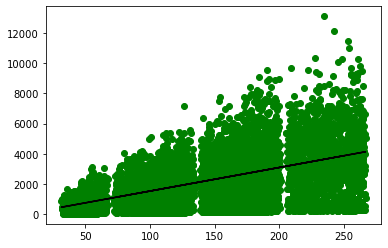

In [87]:
plt.scatter(df['Item_MRP'],df['Item_Outlet_Sales'], color='green')
plt.plot(df['Item_MRP'],Item_Outlet_Sales_pred, color='black')

plt.show()
